<a href="https://colab.research.google.com/github/RajarshiRay25/QSAR-ML-Model-on-Carbonic-Anhydrase-2-and-9/blob/main/Regression_on_CA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CA 2 Inhibition activity QSAR Model Regression

In [1]:
# Import Initial libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Upload CA 2 dataset

data = pd.read_csv('./CA2.csv')
data = data.dropna().drop_duplicates()
data.head()

,Molecule ChEMBL ID,Smiles,Standard Value
3,CHEMBL309608,COCCOC(C)(C)C(=O)Oc1ccc2nc(S(N)(=O)=O)sc2c1,1.40
4,CHEMBL320808,COCC(=O)OCCCS(=O)(=O)c1ccc(S(N)(=O)=O)s1,4.50
5,CHEMBL177623,NS(=O)(=O)NCC1Oc2ccccc2O1,129000.00
6,CHEMBL309950,COCCOCCN(CCOC)C(=O)CC1C(=O)Nc2cc(S(N)(=O)=O)sc...,2.18
7,CHEMBL18,CCOc1ccc2nc(S(N)(=O)=O)sc2c1,3.00


In [ ]:
# Range of IC50 value

data['Standard Value'].describe()

,Standard Value
count,1.018000e+03
mean,3.975813e+15
std,7.279376e+16
min,0.000000e+00
25%,9.000000e+00
50%,6.000000e+01
75%,1.597500e+03
max,1.621810e+18


In [ ]:
# and IC50 values are in the 'Standard Value' column (in µM) - Processing the bioactivity


# Step 1: Convert IC50 from µM to M (if needed)
data['IC50_Molar'] = data['Standard Value'] * 1e-6  # Converting µM to M

# Step 2: Replace zero or negative IC50 values with a small positive number to avoid log10 errors
data['IC50_Molar'] = data['IC50_Molar'].replace(0, 1e-12)

# Step 3: Apply the pIC50 formula
data['pIC50'] = 9 - np.log10(data['IC50_Molar'])

In [ ]:
# Final Dataset

data.head()

,Molecule ChEMBL ID,Smiles,Standard Value,IC50_Molar,pIC50
3,CHEMBL309608,COCCOC(C)(C)C(=O)Oc1ccc2nc(S(N)(=O)=O)sc2c1,1.40,0.000001,14.853872
4,CHEMBL320808,COCC(=O)OCCCS(=O)(=O)c1ccc(S(N)(=O)=O)s1,4.50,0.000005,14.346787
5,CHEMBL177623,NS(=O)(=O)NCC1Oc2ccccc2O1,129000.00,0.129000,9.889410
6,CHEMBL309950,COCCOCCN(CCOC)C(=O)CC1C(=O)Nc2cc(S(N)(=O)=O)sc...,2.18,0.000002,14.661544
7,CHEMBL18,CCOc1ccc2nc(S(N)(=O)=O)sc2c1,3.00,0.000003,14.522879


In [ ]:
# Save Transformed file - Stage 1

data.to_csv('processed_data.csv', index=False)

## Building Regression Models to develop prediction ML models to determine the pIC50 values of chemical candidates.

 - Using the above generated file, we obtain the descriptors from the PADEL Descriptors software which will be featurised in this ML model.

In [2]:
# Import ML libraries

from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
regression_data = pd.read_csv('./CA2 descriptors qsar.csv')
# Replace NaN values with 0 - data preprocessing

regression_data = regression_data.fillna(0)
regression_data.head()

,Name,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,SubFPC299,SubFPC300,SubFPC301,SubFPC302,SubFPC303,SubFPC304,SubFPC305,SubFPC306,SubFPC307,pIC50
0,CHEMBL309608,0,-0.0256,0.000655,57.3541,49.454274,9,10,42,24,...,0,7,7,8,0,0,0,0,10,14.853872
1,CHEMBL320808,0,-1.3806,1.906056,58.0822,43.015895,5,5,36,21,...,0,8,8,9,0,0,0,0,7,14.346787
2,CHEMBL177623,0,-1.6122,2.599189,24.7695,29.055930,6,6,25,15,...,0,6,6,3,0,0,0,0,9,9.889410
3,CHEMBL309950,0,-2.3511,5.527671,94.8556,64.047825,5,5,56,31,...,0,18,18,13,0,0,0,0,11,14.661544
4,CHEMBL18,0,-0.1473,0.021697,30.5447,32.913930,9,10,26,16,...,0,3,3,3,0,0,0,0,8,14.522879


In [4]:
# Perform outlier processing and statistical operations to filter the dataset

regression_data = regression_data.drop(['Name'], axis=1)
regression_data.head()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,SubFPC299,SubFPC300,SubFPC301,SubFPC302,SubFPC303,SubFPC304,SubFPC305,SubFPC306,SubFPC307,pIC50
0,0,-0.0256,0.000655,57.3541,49.454274,9,10,42,24,18,...,0,7,7,8,0,0,0,0,10,14.853872
1,0,-1.3806,1.906056,58.0822,43.015895,5,5,36,21,15,...,0,8,8,9,0,0,0,0,7,14.346787
2,0,-1.6122,2.599189,24.7695,29.055930,6,6,25,15,10,...,0,6,6,3,0,0,0,0,9,9.889410
3,0,-2.3511,5.527671,94.8556,64.047825,5,5,56,31,25,...,0,18,18,13,0,0,0,0,11,14.661544
4,0,-0.1473,0.021697,30.5447,32.913930,9,10,26,16,10,...,0,3,3,3,0,0,0,0,8,14.522879


In [5]:
# Ensure pIC50 is retained by setting aside before filtering
pIC50 = regression_data["pIC50"]  # Store pIC50 separately
features_only = regression_data.drop(columns=['pIC50'])  # Drop pIC50 temporarily

In [6]:
# Variance Threshold

from sklearn.feature_selection import VarianceThreshold
threshold = VarianceThreshold(threshold=0.1)

In [7]:
def variance_threshold_selector(data, threshold=0.15):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [8]:
# Filter the dataset with only high variance data

regression_data_HV = variance_threshold_selector(features_only)

In [9]:
regression_data_HV.head()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,SubFPC274,SubFPC275,SubFPC287,SubFPC295,SubFPC296,SubFPC300,SubFPC301,SubFPC302,SubFPC303,SubFPC307
0,0,-0.0256,0.000655,57.3541,49.454274,9,10,42,24,18,...,9,2,4,12,0,7,7,8,0,10
1,0,-1.3806,1.906056,58.0822,43.015895,5,5,36,21,15,...,5,1,8,10,0,8,8,9,0,7
2,0,-1.6122,2.599189,24.7695,29.055930,6,6,25,15,10,...,6,2,0,5,0,6,6,3,0,9
3,0,-2.3511,5.527671,94.8556,64.047825,5,5,56,31,25,...,5,3,8,18,0,18,18,13,0,11
4,0,-0.1473,0.021697,30.5447,32.913930,9,10,26,16,10,...,9,2,4,7,0,3,3,3,0,8


In [10]:
regression_data_HV = pd.concat([regression_data_HV, pIC50], axis=1)

In [11]:
regression_data_HV.head()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,SubFPC275,SubFPC287,SubFPC295,SubFPC296,SubFPC300,SubFPC301,SubFPC302,SubFPC303,SubFPC307,pIC50
0,0,-0.0256,0.000655,57.3541,49.454274,9,10,42,24,18,...,2,4,12,0,7,7,8,0,10,14.853872
1,0,-1.3806,1.906056,58.0822,43.015895,5,5,36,21,15,...,1,8,10,0,8,8,9,0,7,14.346787
2,0,-1.6122,2.599189,24.7695,29.055930,6,6,25,15,10,...,2,0,5,0,6,6,3,0,9,9.889410
3,0,-2.3511,5.527671,94.8556,64.047825,5,5,56,31,25,...,3,8,18,0,18,18,13,0,11,14.661544
4,0,-0.1473,0.021697,30.5447,32.913930,9,10,26,16,10,...,2,4,7,0,3,3,3,0,8,14.522879


In [12]:
# Perform correlation analysis now to assess the highly correlated features which we will remove

correlated_features = set()
corr_matrix = regression_data_HV.corr()

In [13]:
# Highly correlated features

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

In [14]:
correlated_features

{'AATS0s',
 'AATS1i',
 'AATS1v',
 'AATS2i',
 'AATS2m',
 'AATS2s',
 'AATS2v',
 'AATS3e',
 'AATS3i',
 'AATS3m',
 'AATS3s',
 'AATS3v',
 'AATS4e',
 'AATS4i',
 'AATS4m',
 'AATS4s',
 'AATS4v',
 'AATS5m',
 'AATS5v',
 'AATS6m',
 'AATS6v',
 'AATS7e',
 'AATS8i',
 'AATS8v',
 'AATSC0c',
 'AATSC0i',
 'AATSC0m',
 'AATSC0s',
 'AATSC1c',
 'AATSC1m',
 'AATSC1s',
 'AATSC2m',
 'AATSC2s',
 'AATSC2v',
 'AATSC3m',
 'AATSC3s',
 'AATSC3v',
 'AATSC4m',
 'AATSC4v',
 'AATSC6s',
 'AATSC8v',
 'AMW',
 'ATS0e',
 'ATS0i',
 'ATS0p',
 'ATS0v',
 'ATS1e',
 'ATS1i',
 'ATS1m',
 'ATS1p',
 'ATS1s',
 'ATS1v',
 'ATS2e',
 'ATS2i',
 'ATS2m',
 'ATS2p',
 'ATS2s',
 'ATS2v',
 'ATS3e',
 'ATS3i',
 'ATS3m',
 'ATS3p',
 'ATS3s',
 'ATS3v',
 'ATS4e',
 'ATS4i',
 'ATS4m',
 'ATS4p',
 'ATS4s',
 'ATS4v',
 'ATS5e',
 'ATS5i',
 'ATS5m',
 'ATS5p',
 'ATS5s',
 'ATS5v',
 'ATS6e',
 'ATS6i',
 'ATS6m',
 'ATS6p',
 'ATS6s',
 'ATS6v',
 'ATS7e',
 'ATS7i',
 'ATS7m',
 'ATS7p',
 'ATS7s',
 'ATS7v',
 'ATS8e',
 'ATS8i',
 'ATS8m',
 'ATS8p',
 'ATS8s',
 'ATS8v',
 'AT

In [15]:
# Remove highly correlated
def remove_correlated_features(features,data):
  for x in features:
    data.drop(x,axis=1,inplace=True)
  return data

In [16]:
regression_data_HV_corr = remove_correlated_features(correlated_features,regression_data_HV)

In [17]:
regression_data_HV_corr.head()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nN,nO,nS,nF,...,SubFP275,SubFPC16,SubFPC18,SubFPC49,SubFPC137,SubFPC172,SubFPC287,SubFPC295,SubFPC303,pIC50
0,0,-0.0256,0.000655,57.3541,49.454274,9,2,6,2,0,...,1,2,0,0,0,0,4,12,0,14.853872
1,0,-1.3806,1.906056,58.0822,43.015895,5,1,7,3,0,...,1,1,0,0,0,0,8,10,0,14.346787
2,0,-1.6122,2.599189,24.7695,29.055930,6,2,4,1,0,...,1,0,0,0,0,0,0,5,0,9.889410
3,0,-2.3511,5.527671,94.8556,64.047825,5,3,9,3,0,...,1,3,0,0,0,0,8,18,0,14.661544
4,0,-0.1473,0.021697,30.5447,32.913930,9,2,3,2,0,...,1,0,1,0,0,0,4,7,0,14.522879


In [18]:
# Implement Z score method to obtain samples with proper standard distribution and remove outlier samples

from scipy import stats
import numpy as np

# Calculate the Z-score for each data point
z_scores = np.abs(stats.zscore(regression_data_HV_corr['pIC50']))

# Set a threshold to identify outliers
threshold = 2  # Standard practice is to remove points with |Z| > 3

# Filter out the rows where Z-score is greater than the threshold
regression_data_HV_new = regression_data_HV_corr[(z_scores < threshold)]

print(f"Original dataset size: {regression_data_HV.shape}")
print(f"Dataset size after removing outliers: {regression_data_HV_new.shape}")

Original dataset size: (1017, 250)
Dataset size after removing outliers: (1002, 250)


In [19]:
X = regression_data_HV_new.drop(['pIC50'], axis=1)
y = regression_data_HV_new.pIC50

In [20]:
X.head()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nN,nO,nS,nF,...,SubFP135,SubFP275,SubFPC16,SubFPC18,SubFPC49,SubFPC137,SubFPC172,SubFPC287,SubFPC295,SubFPC303
0,0,-0.0256,0.000655,57.3541,49.454274,9,2,6,2,0,...,0,1,2,0,0,0,0,4,12,0
1,0,-1.3806,1.906056,58.0822,43.015895,5,1,7,3,0,...,0,1,1,0,0,0,0,8,10,0
2,0,-1.6122,2.599189,24.7695,29.055930,6,2,4,1,0,...,0,1,0,0,0,0,0,0,5,0
3,0,-2.3511,5.527671,94.8556,64.047825,5,3,9,3,0,...,0,1,3,0,0,0,0,8,18,0
4,0,-0.1473,0.021697,30.5447,32.913930,9,2,3,2,0,...,0,1,0,1,0,0,0,4,7,0


In [21]:
y.head()

,pIC50
0,14.853872
1,14.346787
2,9.889410
3,14.661544
4,14.522879


In [22]:
# Create Train-Test split partition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Perform SVR Model

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [24]:
SVR_pipeline = make_pipeline(StandardScaler(),SVR(kernel='rbf', C=0.6))
SVR_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR(C=0.6))])

In [25]:
predictions_train = SVR_pipeline.predict(X_train)

predictions_test = SVR_pipeline.predict(X_test)

In [26]:
mean_absolute_error(y_train, predictions_train)

0.39359833088039825

In [27]:
mean_absolute_error(y_test, predictions_test)

0.5047402421704588

In [28]:
np.sqrt(mean_squared_error(y_test, predictions_test))

0.7346456733188804

In [29]:
np.sqrt(mean_squared_error(y_train, predictions_train))

0.6037978319314408

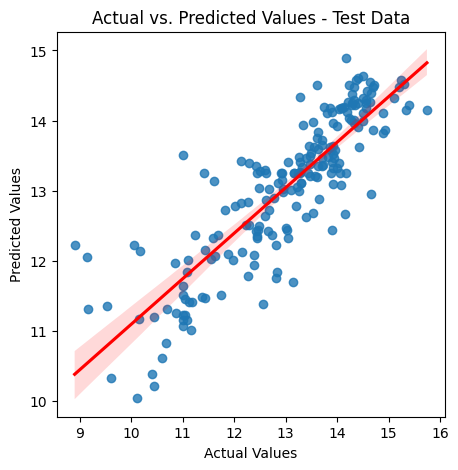

In [30]:
# Create a scatter plot with a regression line using seaborn
plt.figure(figsize=(5, 5))
sns.regplot(x=y_test, y=predictions_test, line_kws={"color": "red"})

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values - Test Data')

# Show the plot
plt.show()

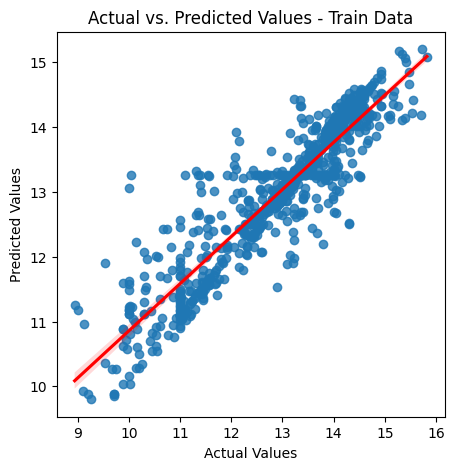

In [31]:
plt.figure(figsize=(5, 5))
sns.regplot(x=y_train, y=predictions_train, line_kws={"color": "red"})

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values - Train Data')

plt.show()

In [32]:
SVR_pipeline.score(X_train, y_train)

0.821602667232882

In [33]:
SVR_pipeline.score(X_test, y_test)

0.725642843645699

In [34]:
r2 = r2_score(y_test, predictions_test)
mae = mean_absolute_error(y_test, predictions_test)
mse = mean_squared_error(y_test, predictions_test)

print(f"R² Score (Test Data): {r2}")
print(f"Mean Absolute Error (MAE) Test Data: {mae}")
print(f"Mean Squared Error (MSE) Test Data: {mse}")

R² Score (Test Data): 0.725642843645699
Mean Absolute Error (MAE) Test Data: 0.5047402421704588
Mean Squared Error (MSE) Test Data: 0.5397042653261512


In [35]:
r2_tr = r2_score(y_train, predictions_train)
mae_tr = mean_absolute_error(y_train, predictions_train)
mse_tr = mean_squared_error(y_train, predictions_train)

print(f"R² Score (Train Data): {r2_tr}")
print(f"Mean Absolute Error (MAE) Train Data: {mae_tr}")
print(f"Mean Squared Error (MSE) Train Data: {mse_tr}")

R² Score (Train Data): 0.821602667232882
Mean Absolute Error (MAE) Train Data: 0.39359833088039825
Mean Squared Error (MSE) Train Data: 0.36457182184510833


In [36]:
# Performing Random Forest Regression Model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [37]:
# Initialize RandomForest Regressor
rf_regressor = RandomForestRegressor(
    n_estimators=500,          # Number of trees in the forest
    random_state=42,           # Seed for reproducibility
    max_depth=40,              # Maximum depth of each tree
    min_samples_split=5,       # Minimum number of samples required to split an internal node
    min_samples_leaf=2,        # Minimum number of samples required to be at a leaf node
    max_features='sqrt',       # Number of features to consider when looking for the best split
    bootstrap=True,            # Whether bootstrap samples are used when building trees
    oob_score=True,            # Out-of-bag samples to estimate generalization error
    n_jobs=-1,                 # Number of jobs to run in parallel (-1 uses all processors)
    verbose=1                  # Verbose level for monitoring
)

# Train the model
rf_regressor.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished


RandomForestRegressor(max_depth=40, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=500, n_jobs=-1,
                      oob_score=True, random_state=42, verbose=1)

In [38]:
# Make predictions on the test data
y_pred_test = rf_regressor.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.1s finished


In [39]:
# Make predictions on the test data
y_pred_train = rf_regressor.predict(X_train)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.1s finished


In [40]:
# Calculate regression metrics
r2 = r2_score(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_test)

# Display metrics
print(f"R² (R-squared) Test Data: {r2}")
print(f"Mean Absolute Error (MAE) Test Data: {mae}")
print(f"Mean Squared Error (MSE) Test Data: {mse}")

R² (R-squared) Test Data: 0.7710420004131686
Mean Absolute Error (MAE) Test Data: 0.4887133413368544
Mean Squared Error (MSE) Test Data: 0.4503968863053093


In [41]:
# Calculate regression metrics
r2_tr = r2_score(y_train, y_pred_train)
mse_tr = mean_squared_error(y_train, y_pred_train)
rmse_tr = np.sqrt(mse_tr)
mae_tr = mean_absolute_error(y_train, y_pred_train)

# Display metrics
print(f"R² (R-squared) Train Data: {r2_tr}")
print(f"Mean Absolute Error (MAE) Train Data: {mae_tr}")
print(f"Mean Squared Error (MSE) Train Data: {mse_tr}")

R² (R-squared) Train Data: 0.9208404243738791
Mean Absolute Error (MAE) Train Data: 0.27913122134264284
Mean Squared Error (MSE) Train Data: 0.1617700794897749


Text(0.5, 1.0, 'Actual vs. Predicted Values QSAR - Test Data')

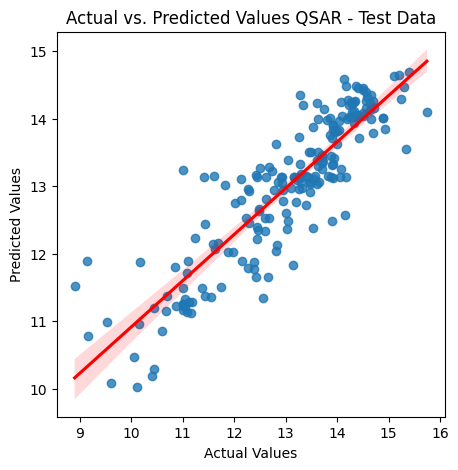

In [42]:
plt.figure(figsize=(5,5))
sns.regplot(x=y_test, y=y_pred_test, line_kws={"color": "red"})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values QSAR - Test Data')

Text(0.5, 1.0, 'Actual vs. Predicted Values QSAR - Train Data')

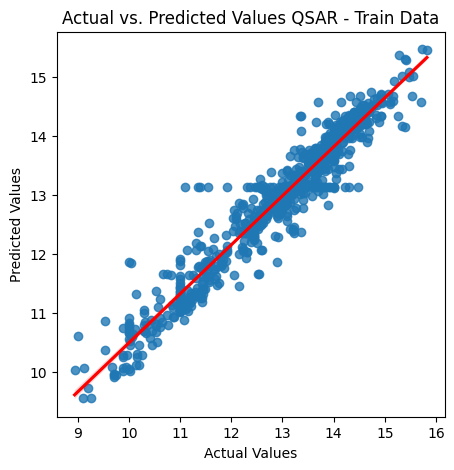

In [43]:
plt.figure(figsize=(5,5))
sns.regplot(x=y_train, y=y_pred_train, line_kws={"color": "red"})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values QSAR - Train Data')

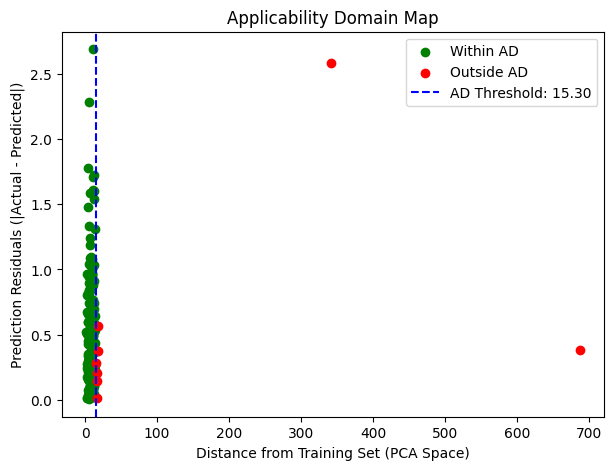

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Standardize the features (mean=0, variance=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Perform PCA on the training set
pca = PCA(n_components=5)  # Adjust the number of components to retain relevant variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 3: Calculate Euclidean distance of each test point from the PCA space origin (training mean)
dist_train = np.linalg.norm(X_train_pca, axis=1)  # Distances of training points in PCA space
dist_test = np.linalg.norm(X_test_pca, axis=1)    # Distances of test points in PCA space

# Step 4: Set the Applicability Domain threshold (e.g., 95th percentile of training distances)
ad_threshold = np.percentile(dist_train, 95)

# Step 5: Determine whether test points are inside or outside the Applicability Domain
test_in_ad = dist_test <= ad_threshold  # Boolean mask for points within the AD

# Step 6: Calculate residuals (errors between actual and predicted values)
residuals_test = np.abs(y_test - y_pred_test)

# Step 7: Create Applicability Domain Plot
plt.figure(figsize=(7, 5))

# Plot points within the Applicability Domain (green)
plt.scatter(dist_test[test_in_ad], residuals_test[test_in_ad], color='green', label='Within AD')

# Plot points outside the Applicability Domain (red)
plt.scatter(dist_test[~test_in_ad], residuals_test[~test_in_ad], color='red', label='Outside AD')

# Plot AD threshold line
plt.axvline(ad_threshold, color='blue', linestyle='--', label=f'AD Threshold: {ad_threshold:.2f}')

# Labels and title
plt.xlabel('Distance from Training Set (PCA Space)')
plt.ylabel('Prediction Residuals (|Actual - Predicted|)')
plt.title('Applicability Domain Map')
plt.legend()

plt.show()


In [ ]:
# Using Cross Validation at K Folds

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

# Define the Random Forest model with additional hyperparameters
rf_regressor = RandomForestRegressor(
    n_estimators=500,          # Number of trees in the forest
    random_state=42,           # Seed for reproducibility
    max_depth=10,              # Maximum depth of each tree
    min_samples_split=5,       # Minimum number of samples required to split an internal node
    min_samples_leaf=2,        # Minimum number of samples required to be at a leaf node
    max_features='sqrt',       # Number of features to consider when looking for the best split
    bootstrap=True,            # Whether bootstrap samples are used when building trees
    oob_score=True,            # Out-of-bag samples to estimate generalization error
    n_jobs=-1,                 # Number of jobs to run in parallel (-1 uses all processors)
    verbose=1                  # Verbose level for monitoring
)

# Define a 5-fold cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and evaluate with different metrics
mse_scorer = make_scorer(mean_squared_error)
mae_scorer = make_scorer(mean_absolute_error)
r2_scorer = make_scorer(r2_score)

# Perform cross-validation with different scorers
mse_scores = cross_val_score(rf_regressor, X, y, cv=cv, scoring=mse_scorer, n_jobs=-1)
mae_scores = cross_val_score(rf_regressor, X, y, cv=cv, scoring=mae_scorer, n_jobs=-1)
r2_scores = cross_val_score(rf_regressor, X, y, cv=cv, scoring=r2_scorer, n_jobs=-1)

# Fit the model on the entire training data
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_test = rf_regressor.predict(X_test)
y_pred_train = rf_regressor.predict(X_train)

# Compute metrics on test data
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)


# Compute metrics on train data
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.1s finis

In [ ]:
# Display the cross-validation and test results
print(f"Cross-Validated MSE: {mse_scores.mean()} ± {mse_scores.std()}")
print(f"Cross-Validated MAE: {mae_scores.mean()} ± {mae_scores.std()}")
print(f"Cross-Validated R²: {r2_scores.mean()} ± {r2_scores.std()}")
print(f"Test Set MSE: {mse_test}")
print(f"Test Set MAE: {mae_test}")
print(f"Test Set R²: {r2_test}")
print("------------------------------------")
print(f"Train Set MSE: {mse_train}")
print(f"Train Set MAE: {mae_train}")
print(f"Train Set R²: {r2_train}")

Cross-Validated MSE: 0.5133115181764805 ± 0.040754629693307745
Cross-Validated MAE: 0.5272658488935669 ± 0.019234027678375683
Cross-Validated R²: 0.7463113923950985 ± 0.02053177482683043
Test Set MSE: 0.4564872235022397
Test Set MAE: 0.4950143926029008
Test Set R²: 0.7679459945041197
------------------------------------
Train Set MSE: 0.19454237935942784
Train Set MAE: 0.3199832507441501
Train Set R²: 0.9048038287428701
